In [78]:
# Imports initiaux

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from scipy.stats import ttest_ind

In [24]:
df = pd.read_csv(r'data_center\Apple Stock Prices (1981 to 2023).csv')

print(df.head(-1))

print(df.info())

             Date        Open        High         Low       Close   Adj Close  \
0      02/01/1981    0.154018    0.155134    0.154018    0.154018    0.119849   
1      05/01/1981    0.151228    0.151228    0.150670    0.150670    0.117244   
2      06/01/1981    0.144531    0.144531    0.143973    0.143973    0.112032   
3      07/01/1981    0.138393    0.138393    0.137835    0.137835    0.107256   
4      08/01/1981    0.135603    0.135603    0.135045    0.135045    0.105085   
...           ...         ...         ...         ...         ...         ...   
10602  20/01/2023  135.279999  138.020004  134.220001  137.869995  137.869995   
10603  23/01/2023  138.119995  143.320007  137.899994  141.110001  141.110001   
10604  24/01/2023  140.309998  143.160004  140.300003  142.529999  142.529999   
10605  25/01/2023  140.889999  142.429993  138.809998  141.860001  141.860001   
10606  26/01/2023  143.169998  144.250000  141.899994  143.960007  143.960007   

         Volume  
0      21

In [25]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [33]:
#Modification de la date : ajout de dayfirst pour les erreurs de conversion de date américaine vs Europpéen

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Year'] = df['Date'].dt.year

In [34]:
print(df.describe())

                                Date          Open          High  \
count                          10608  10608.000000  10608.000000   
mean   2002-01-05 14:08:33.122171904     16.689173     16.879955   
min              1981-01-02 00:00:00      0.049665      0.049665   
25%              1991-06-27 18:00:00      0.287946      0.296875   
50%              2002-01-02 12:00:00      0.488839      0.495536   
75%              2012-07-13 18:00:00     16.320893     16.418483   
max              2023-01-27 00:00:00    182.630005    182.940002   
std                              NaN     35.450519     35.882848   

                Low         Close     Adj Close        Volume          Year  
count  10608.000000  10608.000000  10608.000000  1.060800e+04  10608.000000  
mean      16.500822     16.697362     16.027345  3.275098e+08   2001.513763  
min        0.049107      0.049107      0.038213  0.000000e+00   1981.000000  
25%        0.282355      0.288923      0.238909  1.213044e+08   1991.000000

In [ ]:
cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

summary_stats = df[cols].agg(['mean', 'median', 'std']).transpose()

print(summary_stats)

                   mean        median           std
Open       1.668917e+01  4.888390e-01  3.545052e+01
High       1.687996e+01  4.955360e-01  3.588285e+01
Low        1.650082e+01  4.804465e-01  3.503129e+01
Close      1.669736e+01  4.877010e-01  3.547391e+01
Adj Close  1.602735e+01  4.048505e-01  3.515488e+01
Volume     3.275098e+08  2.145976e+08  3.378203e+08


On observe que pour Open, High, Low, Close et Adj Close la mediane est inférieur d'un facteur 100 par rapport à la moyenne.
Cela signifie une explosion du prix de l'action à un moment donné.

In [35]:
numeric_data = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
correlation_matrix

,Open,High,Low,Close,Adj Close,Volume,Year
Open,1.000000,0.999939,0.999923,0.999838,0.999551,-0.214757,0.655811
High,0.999939,1.000000,0.999911,0.999924,0.999663,-0.214234,0.655383
Low,0.999923,0.999911,1.000000,0.999927,0.999620,-0.215607,0.656209
Close,0.999838,0.999924,0.999927,1.000000,0.999718,-0.214933,0.655772
Adj Close,0.999551,0.999663,0.999620,0.999718,1.000000,-0.217396,0.643068
Volume,-0.214757,-0.214234,-0.215607,-0.214933,-0.217396,1.000000,0.144034
Year,0.655811,0.655383,0.656209,0.655772,0.643068,0.144034,1.000000


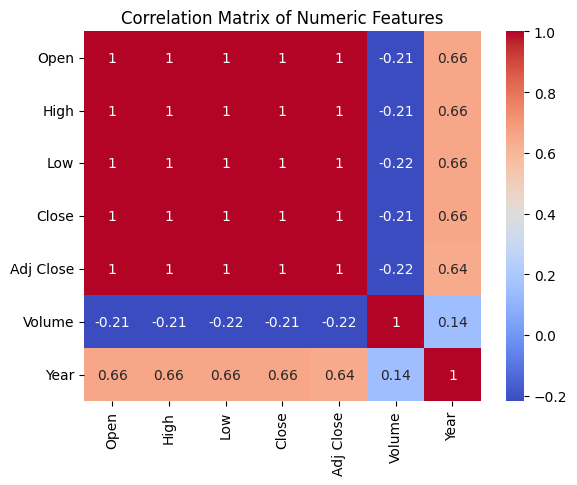

In [36]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

On s'en doutait mais la corrélation entre les ventes et les prix sont élevé:
Les colonnes Open, High, Low, Close, Adj Close sont très fortement corrélées entre elles (coefficients ≈ 0.9995 à 1).
Logique, car ce sont des mesures du prix liées à la même action, juste à différents moments de la journée.

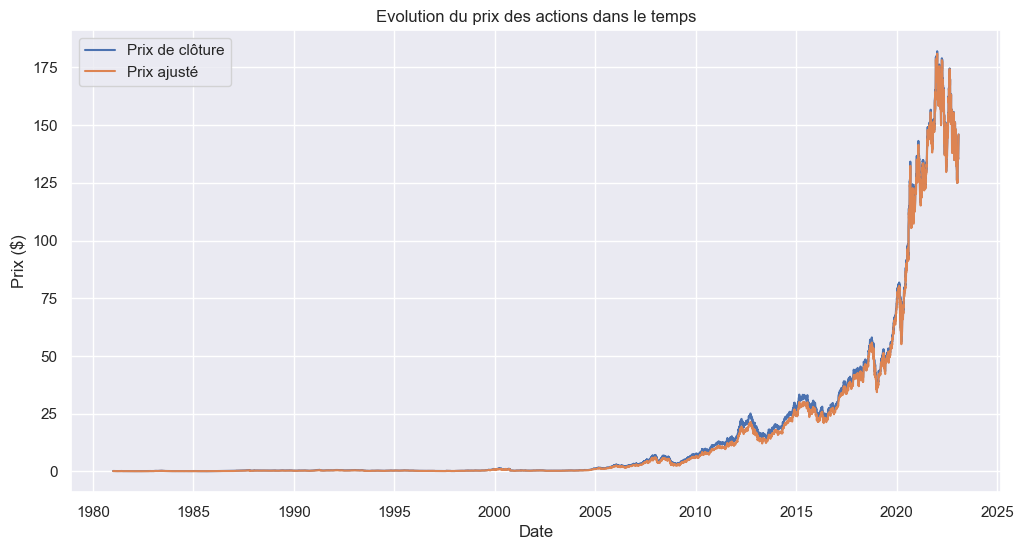

In [39]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Close', label='Prix de clôture')
sns.lineplot(data=df, x='Date', y='Adj Close', label='Prix ajusté')
plt.title('Evolution du prix des actions dans le temps')
plt.xlabel('Date')
plt.ylabel('Prix ($)')
plt.legend()
plt.show()

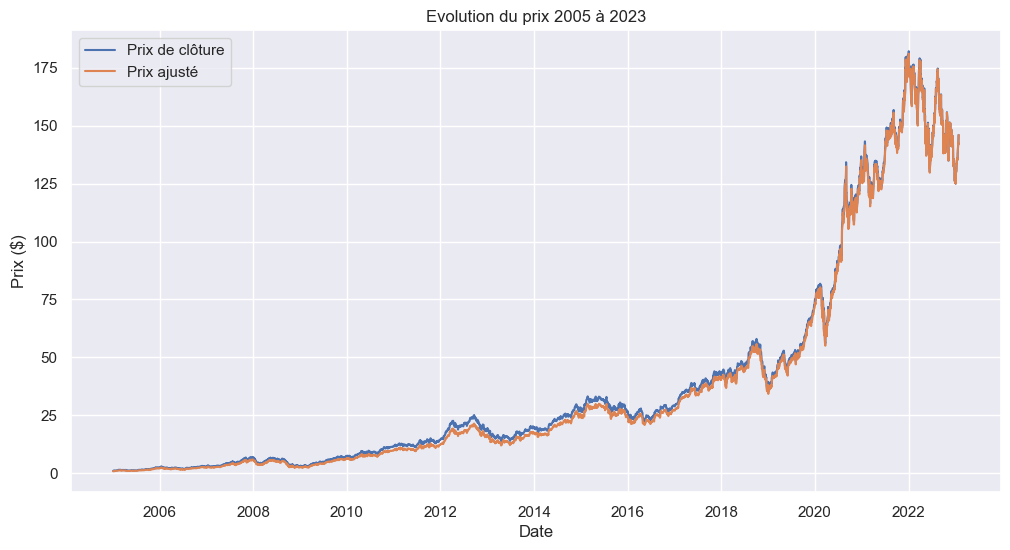

In [46]:
# On va s'interresser à la periode a partir de 2005

df_filtered = df[df['Date'] >= '2005-01-01'].copy()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_filtered, x='Date', y='Close', label='Prix de clôture')
sns.lineplot(data=df_filtered, x='Date', y='Adj Close', label='Prix ajusté')
plt.title('Evolution du prix 2005 à 2023')
plt.xlabel('Date')
plt.ylabel('Prix ($)')
plt.legend()
plt.show()

On observe une explosion du prix lors de la période du covid, ceci est corrélé aux vérification de la médiane et de la moyenne.

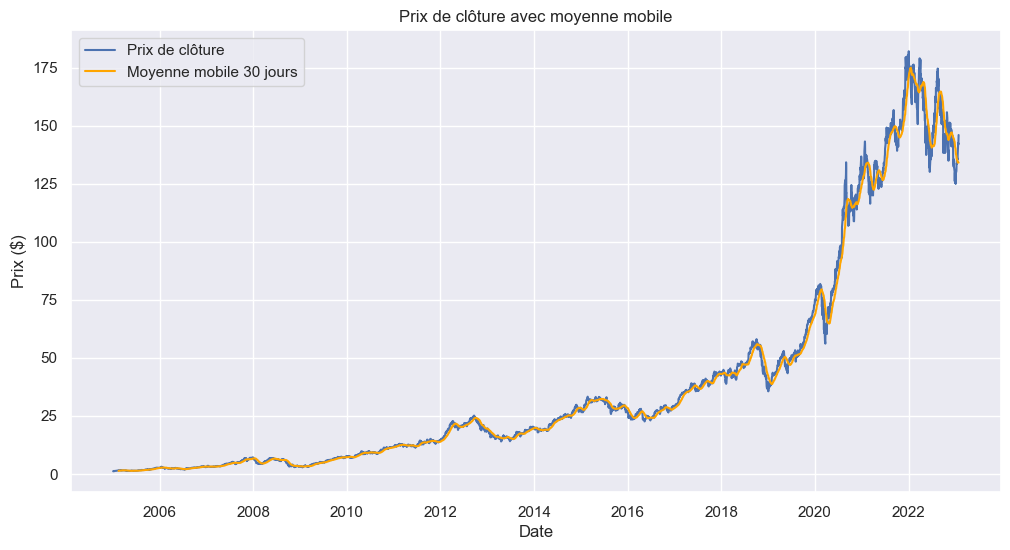

In [47]:
window_size = 30  # moyenne mobile sur 30 jours

df_filtered['MA30_Close'] = df_filtered['Close'].rolling(window=window_size).mean()

plt.figure(figsize=(12,6))
plt.plot(df_filtered['Date'], df_filtered['Close'], label='Prix de clôture')
plt.plot(df_filtered['Date'], df_filtered['MA30_Close'], label=f'Moyenne mobile {window_size} jours', color='orange')
plt.title('Prix de clôture avec moyenne mobile')
plt.xlabel('Date')
plt.ylabel('Prix ($)')
plt.legend()
plt.grid(True)
plt.show()

La tendance suit bien la courbe

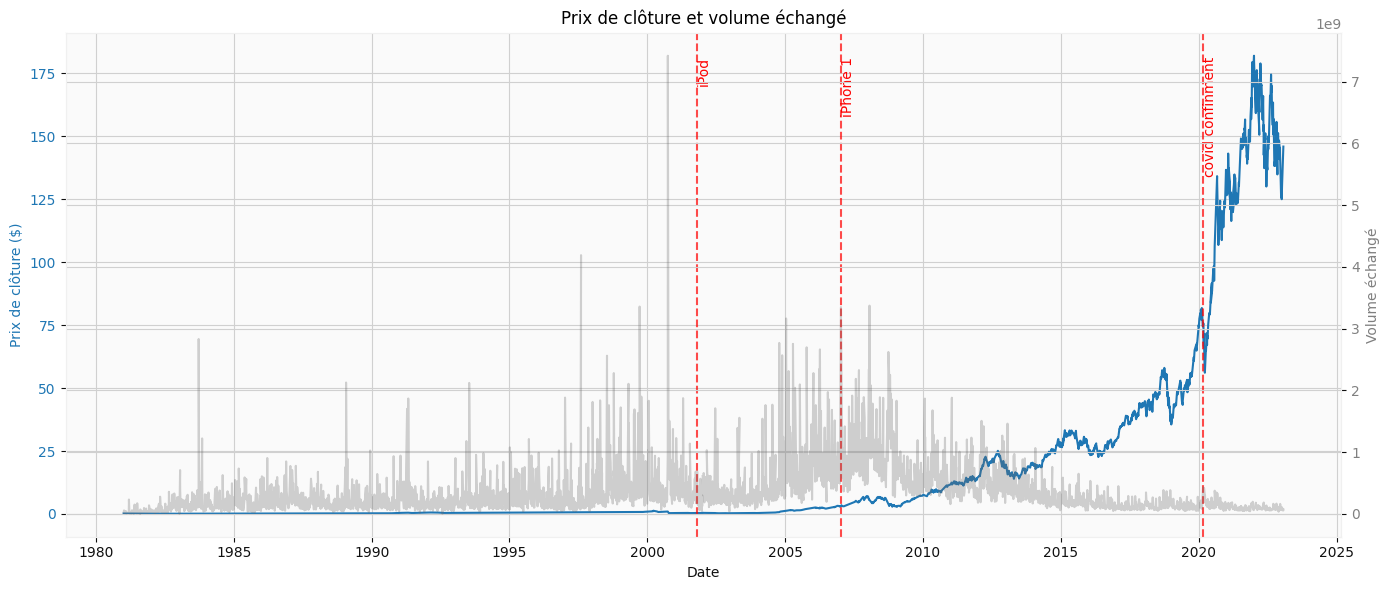

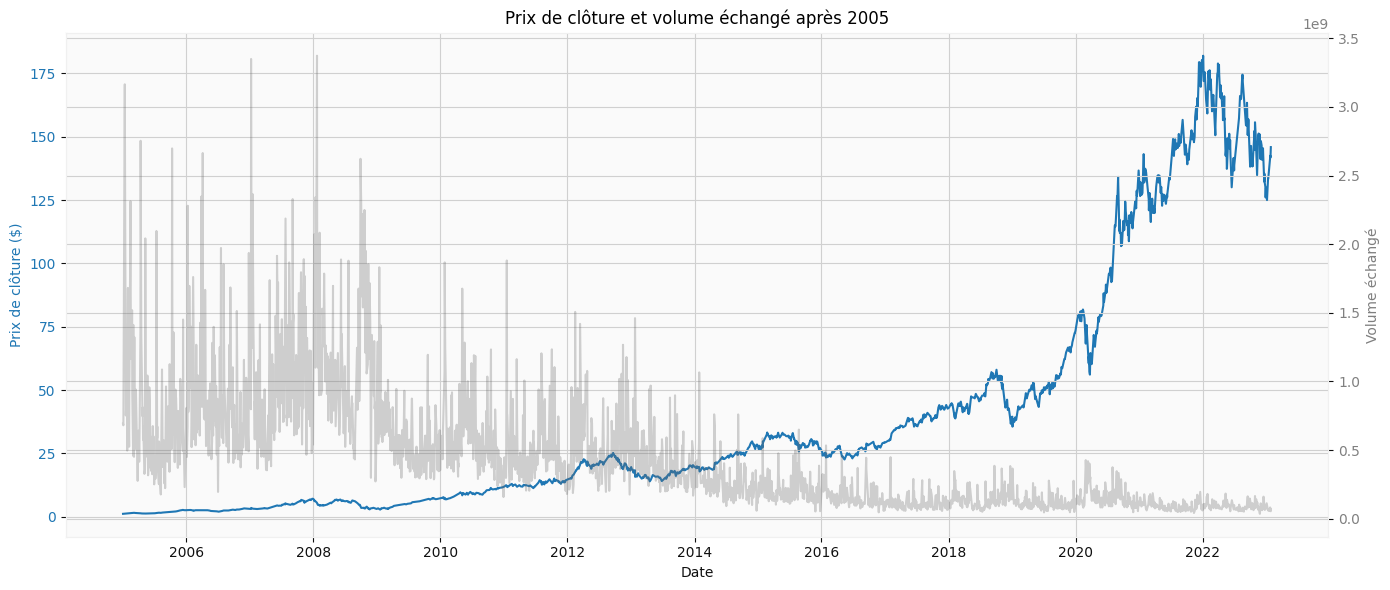

In [75]:
fig, ax1 = plt.subplots(figsize=(14,6))

# Tracer le prix de clôture
ax1.set_title('Prix de clôture et volume échangé')
ax1.set_xlabel('Date')
ax1.set_ylabel('Prix de clôture ($)', color='tab:blue')
ax1.plot(df['Date'], df['Close'], color='tab:blue', label='Prix de clôture')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Créer un second axe Y pour le volume
ax2 = ax1.twinx()
ax2.set_ylabel('Volume échangé', color='tab:gray')
ax2.plot(df['Date'], df['Volume'], alpha=0.3, color='dimgray', label='Volume')
ax2.tick_params(axis='y', labelcolor='gray')

dates_events = {
    'iPod': '2001-10-23',
    'iPhone 1': '2007-01-09',
    'covid confinment': '2020-03-01'
}

for event, date_str in dates_events.items():
    date = pd.to_datetime(date_str)
    ax1.axvline(date, color='red', linestyle='--', alpha=0.7)
    ax1.text(date, ax1.get_ylim()[1]*0.95, event, rotation=90, verticalalignment='top', color='red', fontsize=10)

fig.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(14,6))

# Tracer le prix de clôture
ax1.set_title('Prix de clôture et volume échangé après 2005')
ax1.set_xlabel('Date')
ax1.set_ylabel('Prix de clôture ($)', color='tab:blue')
ax1.plot(df_filtered['Date'], df_filtered['Close'], color='tab:blue', label='Prix de clôture')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Créer un second axe Y pour le volume
ax2 = ax1.twinx()
ax2.set_ylabel('Volume échangé', color='tab:gray')
ax2.plot(df_filtered['Date'], df_filtered['Volume'], alpha=0.3, color='dimgray', label='Volume')
ax2.tick_params(axis='y', labelcolor='gray')

fig.tight_layout()
plt.show()

On observe énormement d'échanges d'actions quand celle-ci était basse?
On observe une explosion du prix des actions au premier confinement lié à la pandemie du covid.
On devrait vérifier la correlation.

In [69]:
correlation = df_filtered['Volume'].corr(df_filtered['Close'], method='pearson')
print(correlation)

-0.5217827560330822


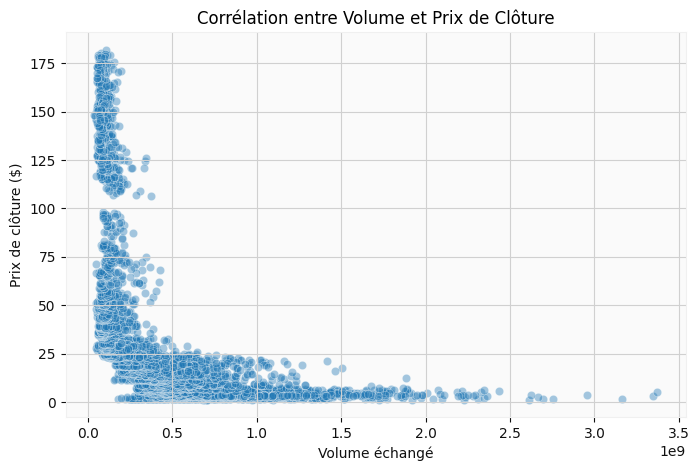

In [76]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Volume', y='Close', data=df_filtered, alpha=0.4)
plt.title('Corrélation entre Volume et Prix de Clôture')
plt.xlabel('Volume échangé')
plt.ylabel('Prix de clôture ($)')
plt.grid(True)
plt.show()

On observe une correlation entre le prix de cloture et le volume

Mais on va observer maintenant si la différence entre le Open et close a un lien sur le Volume de vente

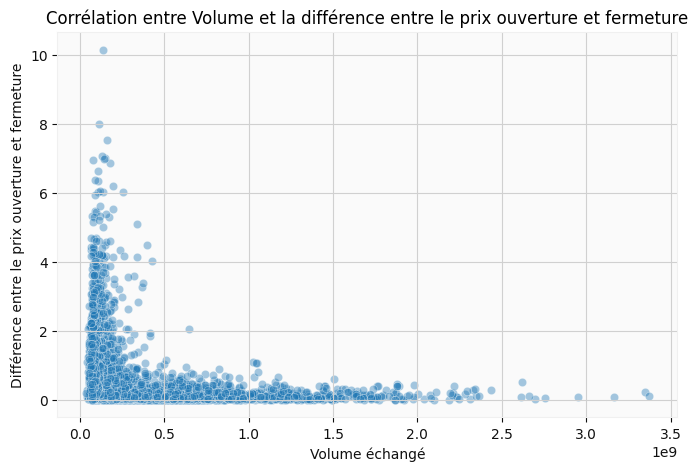

In [82]:
df_filtered['Abs_Diff_Open_Close'] = (df_filtered['Close'] - df_filtered['Open']).abs()

plt.figure(figsize=(8,5))
sns.scatterplot(x='Volume', y='Abs_Diff_Open_Close', data=df_filtered, alpha=0.4)
plt.title('Corrélation entre Volume et la différence entre le prix ouverture et fermeture')
plt.xlabel('Volume échangé')
plt.ylabel('Différence entre le prix ouverture et fermeture')
plt.grid(True)
plt.show()


In [83]:
correlation = df_filtered['Volume'].corr(df_filtered['Abs_Diff_Open_Close'], method='pearson')
print(correlation)

-0.27738574275062183


In [ ]:

correlations_by_year = (df_filtered.groupby('Year').apply(lambda g: g['Volume'].corr(g['Abs_Diff_Open_Close'], method='pearson')))

print(correlations_by_year)

Year
2005    0.339882
2006    0.449918
2007    0.493879
2008    0.419110
2009    0.278778
2010    0.484394
2011    0.471896
2012    0.490223
2013    0.454756
2014    0.165201
2015    0.636380
2016    0.531351
2017    0.462544
2018    0.491753
2019    0.367573
2020    0.398993
2021    0.487514
2022    0.361526
2023    0.632109
dtype: float64


C:\Users\alexa\AppData\Local\Temp\ipykernel_18028\1346022459.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g['Volume'].corr(g['Abs_Diff_Open_Close'], method='pearson'))


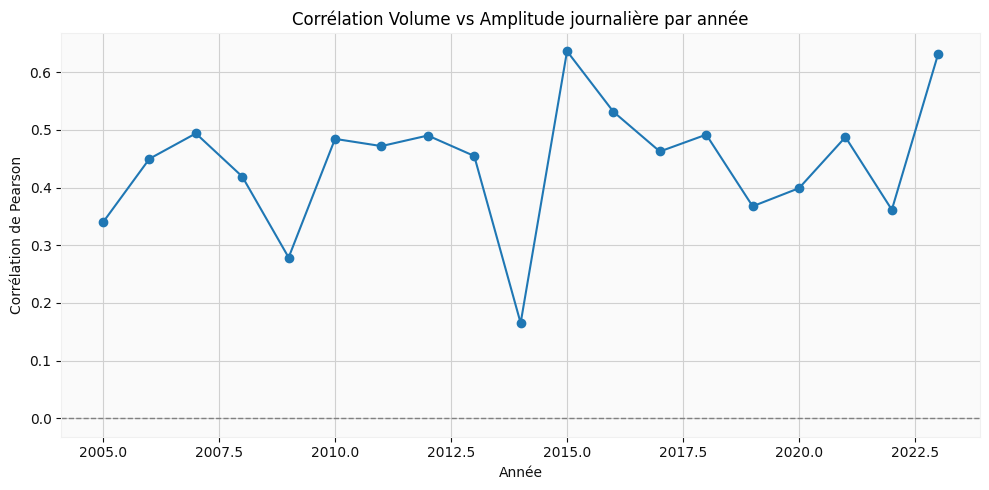

In [85]:

plt.figure(figsize=(10,5))
correlations_by_year.plot(marker='o', linestyle='-')
plt.title("Corrélation Volume vs Amplitude journalière par année")
plt.xlabel("Année")
plt.ylabel("Corrélation de Pearson")
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()


On observe que en 2014 = 0.165201 de corrélation, peut-être une année plus stable, ou avec moins de volatilité liée au volume.

La basse corrélation en 2014 s'explique par un événement unique (split) ayant artificiellement gonflé le volume, sans impact proportionnel sur la volatilité intra-journalière. Ce genre d’anomalie statistique est un bon rappel qu’un contexte économique ou événementiel externe doit toujours être pris en compte dans l’analyse.

In [89]:
# Vérification du rendement par rapport à Adj Close, lié à la redistribution des dividentes
df_filtered['Rendement'] = df_filtered['Adj Close'].pct_change()
df_filtered.head().T

,6059,6060,6061,6062,6063
Date,2005-01-03 00:00:00,2005-01-04 00:00:00,2005-01-05 00:00:00,2005-01-06 00:00:00,2005-01-07 00:00:00
Open,1.156786,1.139107,1.151071,1.154821,1.160714
High,1.162679,1.169107,1.165179,1.159107,1.243393
Low,1.117857,1.124464,1.14375,1.130893,1.15625
Close,1.130179,1.141786,1.151786,1.152679,1.236607
Adj Close,0.963385,0.973279,0.981803,0.982564,1.054106
Volume,691992000,1096810400,680433600,705555200,2227450400
Year,2005,2005,2005,2005,2005
MA30_Close,NaN,NaN,NaN,NaN,NaN
Abs_Diff_Open_Close,0.026607,0.002679,0.000715,0.002142,0.075893


C:\Users\alexa\AppData\Local\Temp\ipykernel_18028\1853181615.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cumulative_returns.index, y=cumulative_returns.values, palette='viridis')


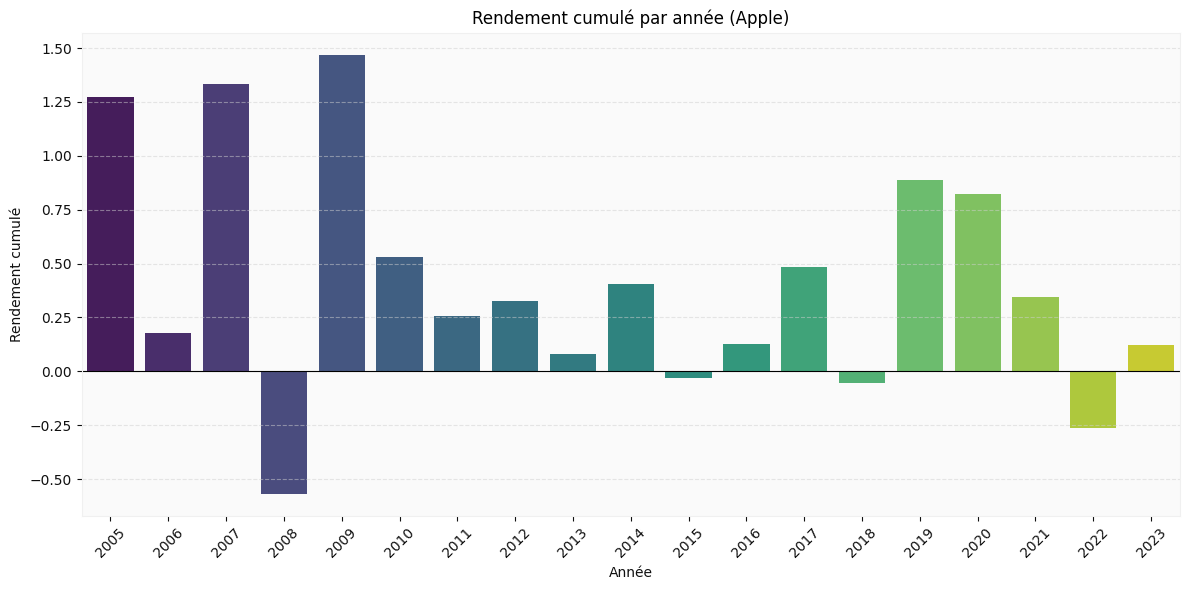

In [97]:
cumulative_returns = df_filtered.groupby('Year')['Rendement'].apply(lambda x: (1 + x).prod() - 1)

plt.figure(figsize=(12,6))
sns.barplot(x=cumulative_returns.index, y=cumulative_returns.values, palette='viridis')
plt.title("Rendement cumulé par année (Apple)")
plt.ylabel("Rendement cumulé")
plt.xlabel("Année")
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

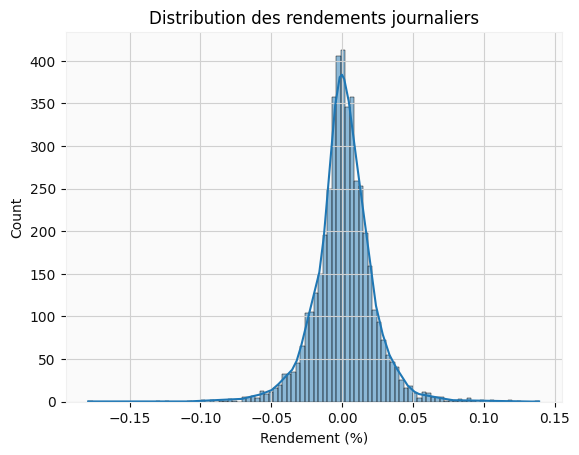

In [ ]:
#Histoire de voir
sns.histplot(df_filtered['Rendement'].dropna(), bins=100, kde=True)
plt.title('Distribution des rendements journaliers')
plt.xlabel('Rendement (%)')
plt.show()

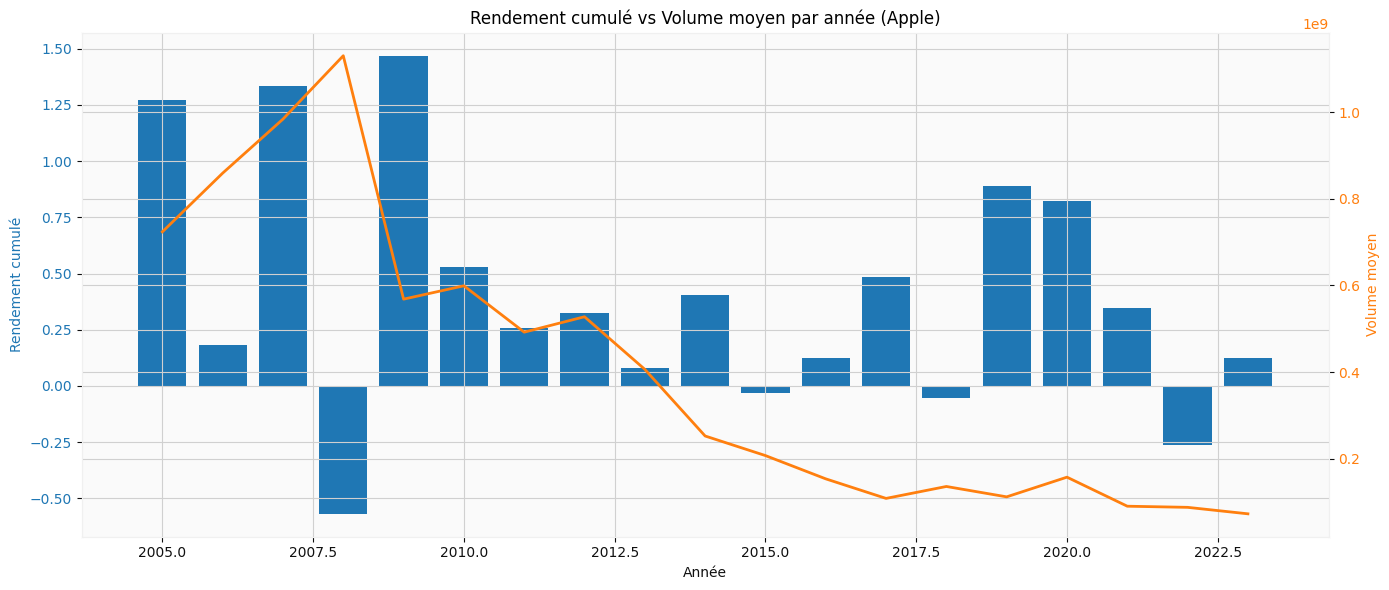

In [101]:
avg_volume = df_filtered.groupby('Year')['Volume'].mean()

fig, ax1 = plt.subplots(figsize=(14,6))

# Barplot du rendement cumulé
ax1.bar(cumulative_returns.index, cumulative_returns.values, color='tab:blue', label='Rendement cumulé')
ax1.set_ylabel('Rendement cumulé', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xlabel('Année')

# Courbe du volume moyen
ax2 = ax1.twinx()
ax2.plot(avg_volume.index, avg_volume.values, color='tab:orange', label='Volume moyen', linewidth=2)
ax2.set_ylabel('Volume moyen', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Rendement cumulé vs Volume moyen par année (Apple)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
fig.tight_layout()
plt.show()

C:\Users\alexa\AppData\Local\Temp\ipykernel_18028\1655901787.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_candle.resample('M').agg({


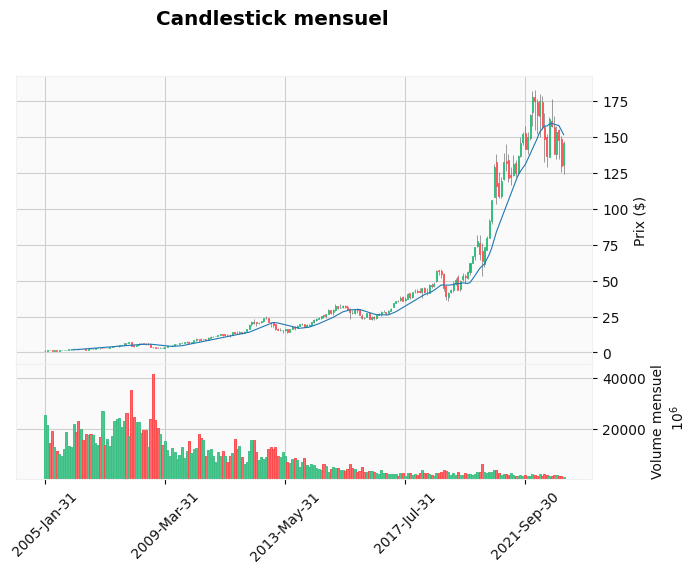

In [80]:
df_candle = df_filtered[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].copy()
df_candle['Date'] = pd.to_datetime(df_candle['Date'])
df_candle.set_index('Date', inplace=True)

# Grouper par mois
df_monthly = df_candle.resample('M').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

mpf.plot(df_monthly, 
         type='candle', 
         volume=True, 
         style='yahoo',
         title='Candlestick mensuel',
         ylabel='Prix ($)',
         ylabel_lower='Volume mensuel',
         mav=(12))  # Moyenne mobile sur 3 mois (optionnel)

Juste une autre façon de voir mais pas vraiment facile à utiliser pour les non initié

In [79]:
# Extraire les données pour deux années
close_2020 = df_filtered[df_filtered['Date'].dt.year == 2020]['Close']
close_2023 = df_filtered[df_filtered['Date'].dt.year == 2023]['Close']

# T-test (indépendant, variance égale par défaut)
t_stat, p_value = ttest_ind(close_2020, close_2023, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Différence significative entre les moyennes (au seuil de 5%).")
else:
    print("❌ Pas de différence significative entre les moyennes.")

T-statistic: -19.3896
P-value: 0.0000
✅ Différence significative entre les moyennes (au seuil de 5%).


A partir de cette analyse on observe un corrélation entre le volume des ventes d'action et le rendement.

Plusieurs dates clef comme le premier Iphone et l'ipod montre un volume de vente et une rentabilité supérieur à cette date-ci.

On observe qu'en 2014 il y a eu une basse corrélation en 2014 s'explique par un événement unique (split) ayant artificiellement gonflé le volume, sans impact proportionnel sur la volatilité intra-journalière. Ce genre d’anomalie statistique est un bon rappel qu’un contexte économique ou événementiel externe doit toujours être pris en compte dans l’analyse.

On pourrait améliorer l'analyse en vérifiant tous les événements et faire des Test en T pour toutes les périodes.

